In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
column_names = data.columns.tolist()

In [7]:
column_names

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

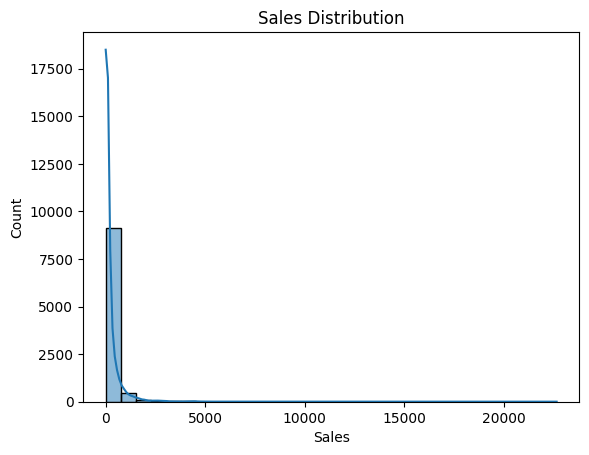

In [9]:
# Plotting Sales distribution
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()


In [13]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)

In [17]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# If there are no missing values, that’s why the heatmap is uniform.
# If there are missing values, proceed with plotting.


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


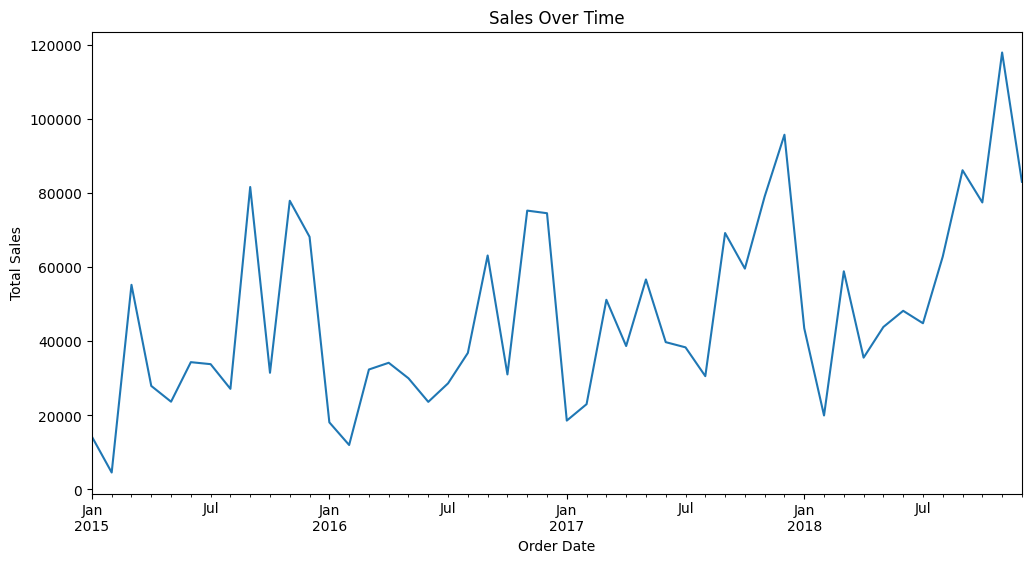

In [22]:
# Group by Order Date and aggregate sales
sales_time = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()

# Plot sales over time (monthly)
sales_time.plot(kind='line', figsize=(12, 6), title='Sales Over Time')
plt.ylabel('Total Sales')
plt.show()


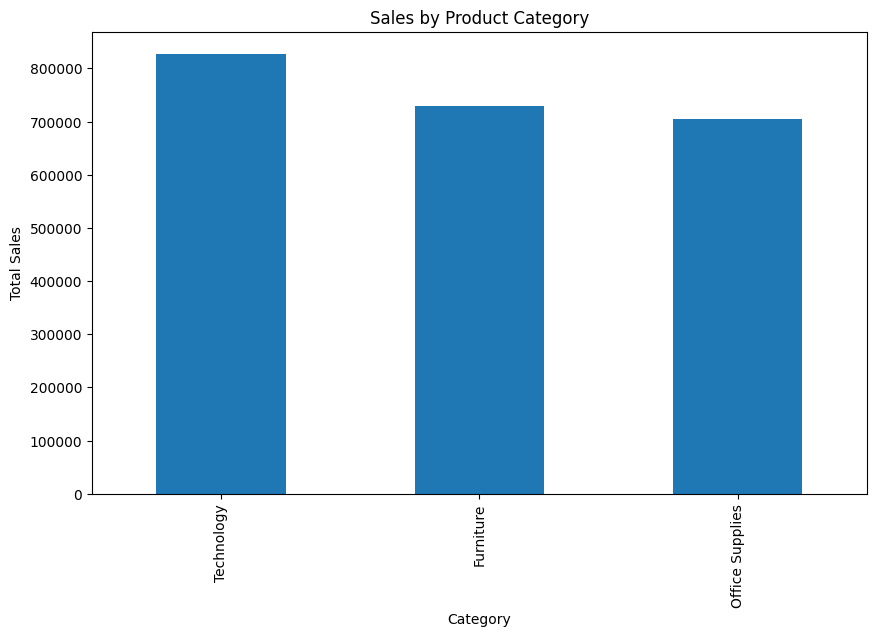

In [23]:
# Group by Category and aggregate sales
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plotting sales by product category
category_sales.plot(kind='bar', figsize=(10, 6), title='Sales by Product Category')
plt.ylabel('Total Sales')
plt.show()


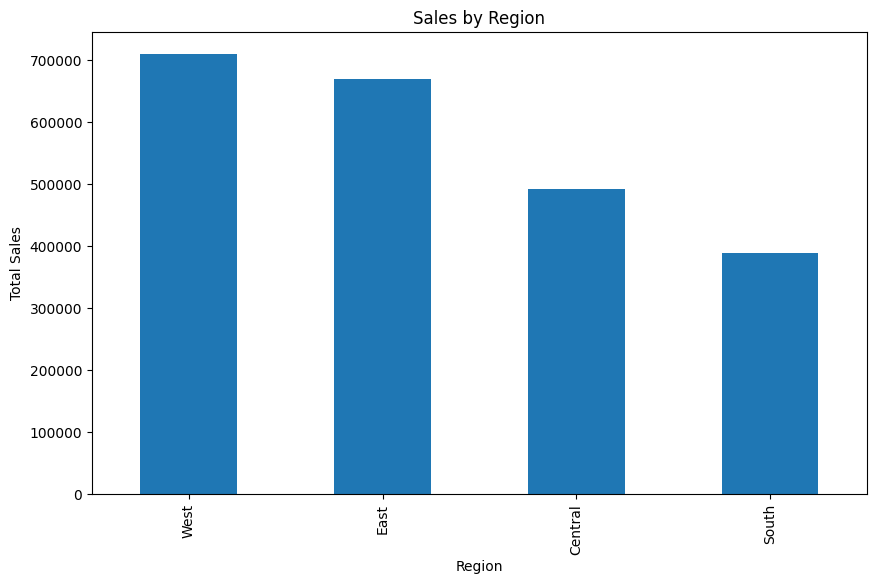

In [24]:
# Group by Region and aggregate sales
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plotting sales by region
region_sales.plot(kind='bar', figsize=(10, 6), title='Sales by Region')
plt.ylabel('Total Sales')
plt.show()


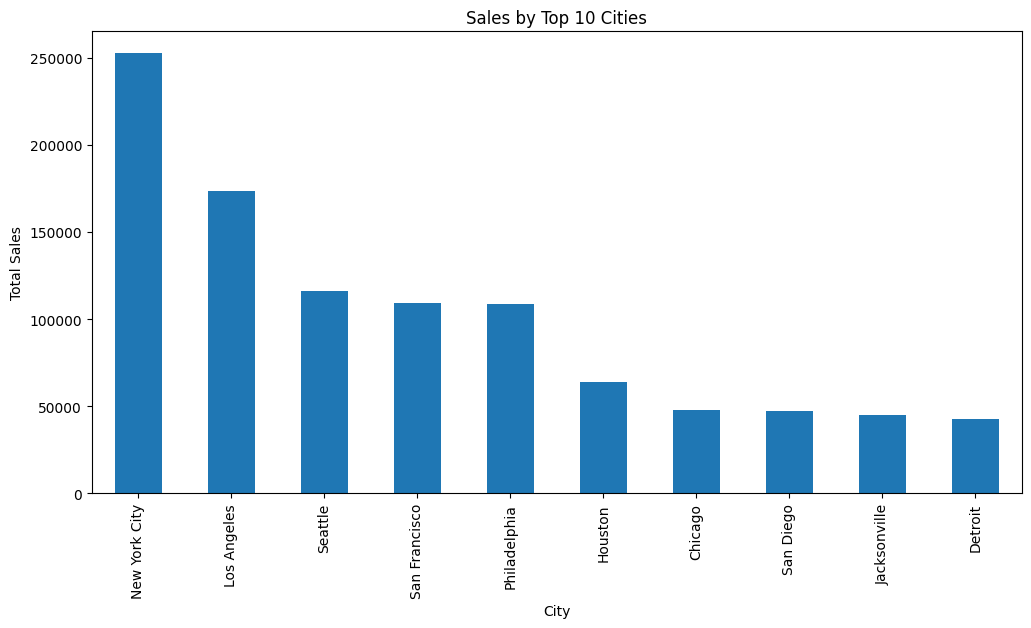

In [25]:
# Group by City and aggregate sales (Top 10 cities)
city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting sales by top 10 cities
city_sales.plot(kind='bar', figsize=(12, 6), title='Sales by Top 10 Cities')
plt.ylabel('Total Sales')
plt.show()


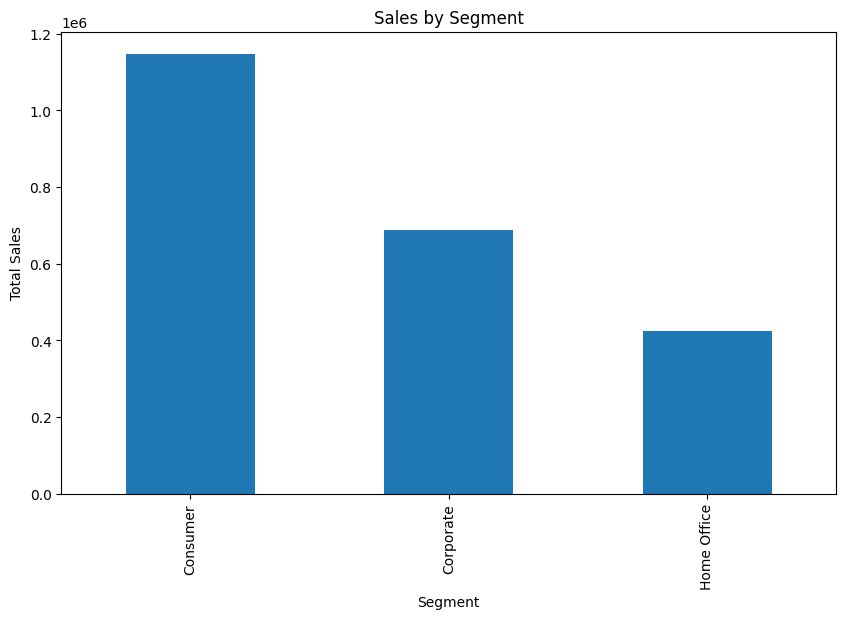

In [26]:
# Group by Segment and aggregate sales
segment_sales = data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Plotting sales by segment
segment_sales.plot(kind='bar', figsize=(10, 6), title='Sales by Segment')
plt.ylabel('Total Sales')
plt.show()


In [28]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

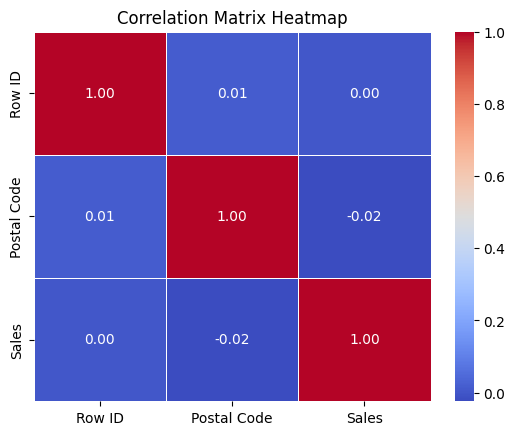

In [29]:
corr_matrix = numeric_df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

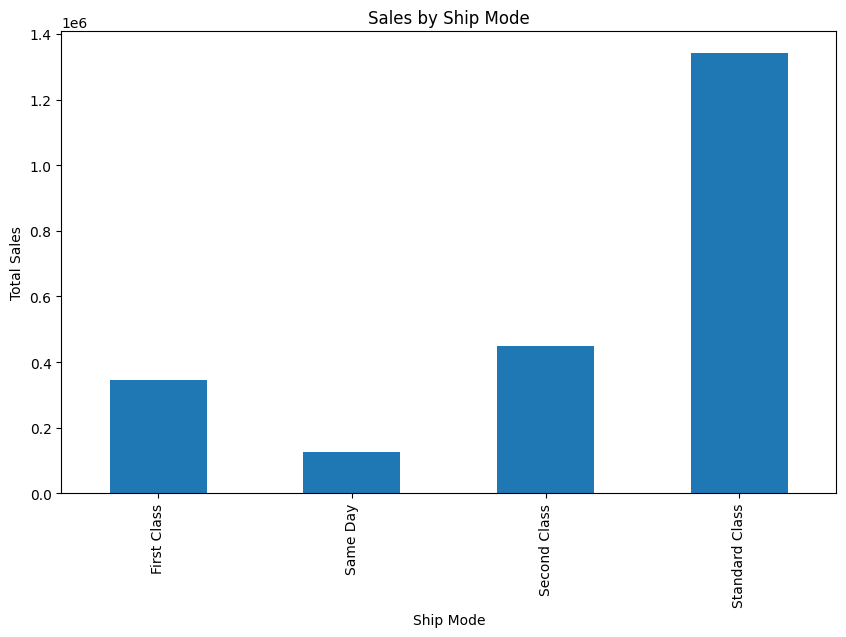

In [30]:
# Group by Ship Mode and aggregate sales
ship_mode_sales = data.groupby('Ship Mode')['Sales'].sum()

# Plotting sales by ship mode
ship_mode_sales.plot(kind='bar', figsize=(10, 6), title='Sales by Ship Mode')
plt.ylabel('Total Sales')
plt.show()


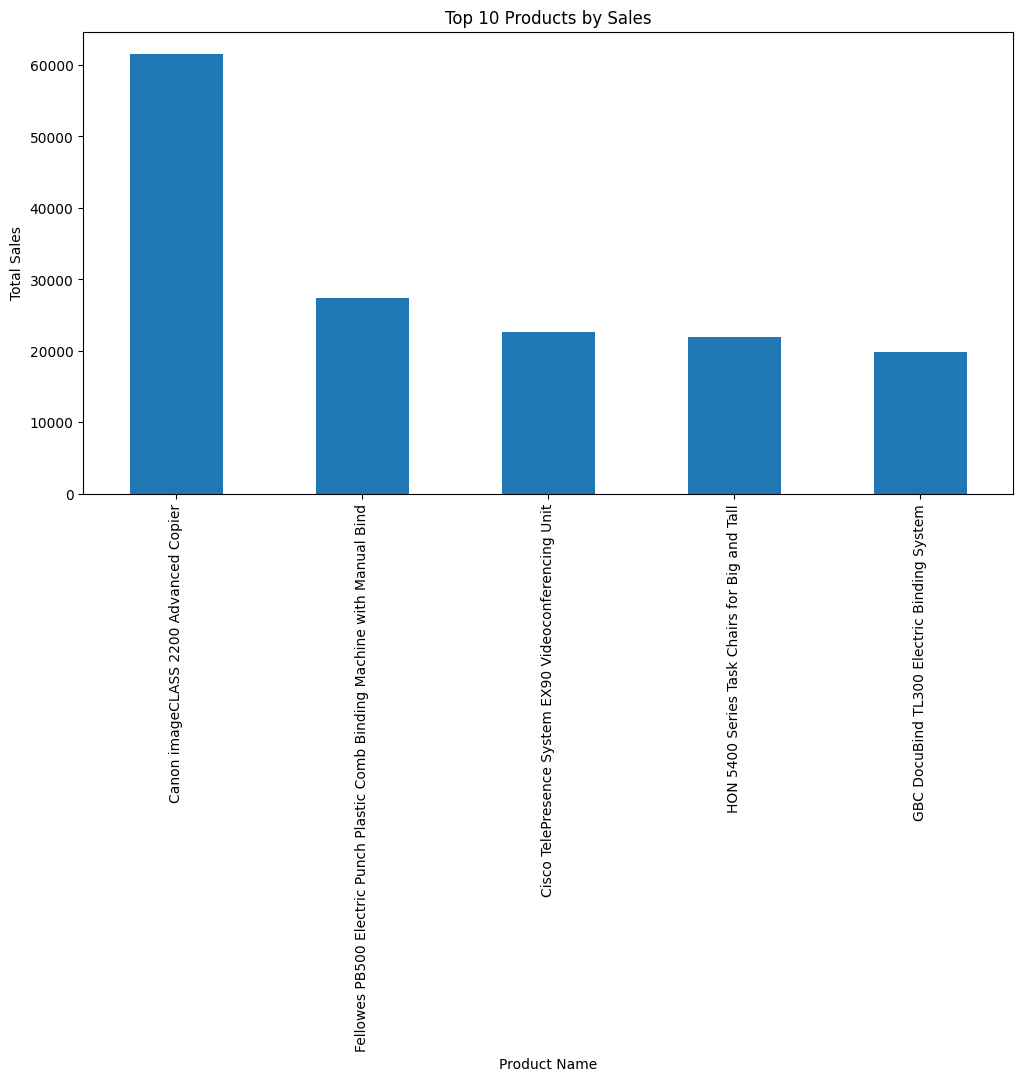

In [32]:
# Group by Product Name and aggregate sales (Top 5 products)
product_sales = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)

# Plotting top 10 products by sales
product_sales.plot(kind='bar', figsize=(12, 6), title='Top 10 Products by Sales')
plt.ylabel('Total Sales')
plt.show()


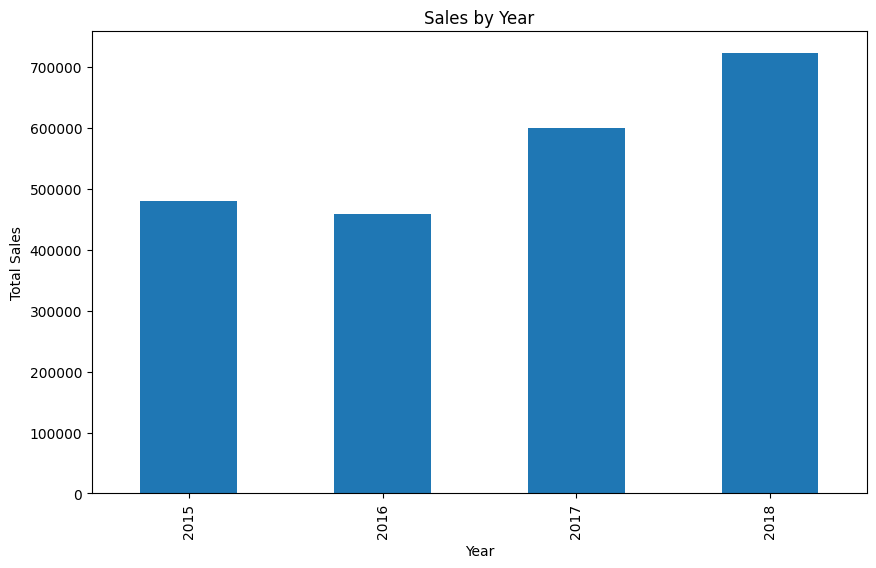

In [34]:
# Extract year and month from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['DayOfWeek'] = data['Order Date'].dt.day_name()

# Group by Year and aggregate sales
sales_by_year = data.groupby('Year')['Sales'].sum()

# Plotting sales by year
sales_by_year.plot(kind='bar', figsize=(10, 6), title='Sales by Year')
plt.ylabel('Total Sales')
plt.show()
